## Prepare Kaggle to load data

In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Kaggle/saleEcu"

%cd /content/drive/MyDrive/Kaggle/saleEcu

Mounted at /content/drive
/content/drive/MyDrive/Kaggle/saleEcu


In [ ]:
!pip install --upgrade kaggle

In [ ]:
!kaggle competitions download -c store-sales-time-series-forecasting

 98% 21.0M/21.4M [00:00<00:00, 85.4MB/s]
100% 21.4M/21.4M [00:00<00:00, 74.2MB/s]


In [ ]:
from zipfile import ZipFile
file_name="/content/drive/MyDrive/Kaggle/saleEcu/store-sales-time-series-forecasting.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

## Preprocessing data


### Import library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from tensorflow import keras
from keras import layers


### Load data

In [ ]:
main_df = pd.read_csv("train.csv" )
stores_df = pd.read_csv("stores.csv")
test_df = pd.read_csv("test.csv")
holidays_events_df = pd.read_csv("holidays_events.csv")
transactions_df = pd.read_csv("transactions.csv")
oil_df = pd.read_csv("oil.csv")

### Analyze data

In [ ]:
whole_df = train_df.merge(stores_df, how='left', on='store_nbr').merge(holidays_events_df, how='left',on = 'date')


In [ ]:
whole_df.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,type_y,locale,locale_name,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False


In [ ]:
whole_df.shape

(3054348, 15)

In [ ]:
whole_df_with_oil = whole_df.merge(oil_df, how='left',on='date')


In [ ]:
whole_df_with_oil
#3054348

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,type_y,locale,locale_name,description,transferred,dcoilwtico
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,NaN
1,1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,NaN
2,2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,NaN
3,3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,NaN
4,4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57
3054344,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57
3054345,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57
3054346,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57


In [ ]:
# #Xử lý bảng oil.csv
if whole_df_with_oil['dcoilwtico'].isna().any():
    whole_df_with_oil['dcoilwtico'].fillna(method='bfill', inplace=True)

whole_df_with_oil['date'] = pd.to_datetime(whole_df_with_oil['date'])


In [ ]:
# #Xử lý bảng holiday
holidays_events_df.shape

(350, 6)

In [ ]:
whole_df_with_oil.isnull().sum()

id                   0
date                 0
store_nbr            0
family               0
sales                0
onpromotion          0
city                 0
state                0
type_x               0
cluster              0
type_y         2551824
locale         2551824
locale_name    2551824
description    2551824
transferred    2551824
dcoilwtico           0
dtype: int64

In [ ]:
#fill nan
whole_df_with_oil['locale'].unique()

array(['National', nan, 'Local', 'Regional'], dtype=object)

In [ ]:
whole_df_with_oil['type_y'].unique()

array(['Holiday', nan, 'Work Day', 'Additional', 'Event', 'Transfer',
       'Bridge'], dtype=object)

In [ ]:
whole_df_with_oil['locale_name'].unique()

array(['Ecuador', nan, 'Manta', 'Cotopaxi', 'Cuenca', 'Libertad',
       'Riobamba', 'Puyo', 'Guaranda', 'Imbabura', 'Machala', 'Latacunga',
       'El Carmen', 'Santo Domingo', 'Cayambe', 'Guayaquil', 'Esmeraldas',
       'Ambato', 'Ibarra', 'Quevedo', 'Santo Domingo de los Tsachilas',
       'Santa Elena', 'Quito', 'Loja', 'Salinas'], dtype=object)

In [ ]:
values = {"type_y": 'NormalDay', "locale":'National' , "locale_name":'Ecuador' }
whole_df_with_oil.fillna(value=values, inplace=True)

In [ ]:
whole_df_with_oil.isnull().sum()

id                   0
date                 0
store_nbr            0
family               0
sales                0
onpromotion          0
city                 0
state                0
type_x               0
cluster              0
type_y               0
locale               0
locale_name          0
description    2551824
transferred    2551824
dcoilwtico           0
dtype: int64

In [ ]:
whole_df_with_oil['transferred'] =  whole_df_with_oil['transferred'].apply(lambda x: 1 if x == True else 0)

In [ ]:
whole_df_with_oil.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3054348 entries, 0 to 3054347
Data columns (total 16 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
 6   city         object        
 7   state        object        
 8   type_x       object        
 9   cluster      int64         
 10  type_y       object        
 11  locale       object        
 12  locale_name  object        
 13  description  object        
 14  transferred  int64         
 15  dcoilwtico   float64       
dtypes: datetime64[ns](1), float64(2), int64(5), object(8)
memory usage: 396.1+ MB


In [ ]:
Y = whole_df_with_oil['sales']
feature_df=whole_df_with_oil.drop(['description','state', 'sales'], axis=1)
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3054348 entries, 0 to 3054347
Data columns (total 13 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   onpromotion  int64         
 5   city         object        
 6   type_x       object        
 7   cluster      int64         
 8   type_y       object        
 9   locale       object        
 10  locale_name  object        
 11  transferred  int64         
 12  dcoilwtico   float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(6)
memory usage: 326.2+ MB


In [ ]:
dum_df  = pd.get_dummies(feature_df,columns=['family','city','type_x','type_y','locale','locale_name'])
dum_df

,id,date,store_nbr,onpromotion,cluster,transferred,dcoilwtico,family_AUTOMOTIVE,family_BABY CARE,family_BEAUTY,...,locale_name_Machala,locale_name_Manta,locale_name_Puyo,locale_name_Quevedo,locale_name_Quito,locale_name_Riobamba,locale_name_Salinas,locale_name_Santa Elena,locale_name_Santo Domingo,locale_name_Santo Domingo de los Tsachilas
0,0,2013-01-01,1,0,13,0,93.14,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2013-01-01,1,0,13,0,93.14,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2013-01-01,1,0,13,0,93.14,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,3,2013-01-01,1,0,13,0,93.14,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,2013-01-01,1,0,13,0,93.14,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,3000883,2017-08-15,9,0,6,0,47.57,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3054344,3000884,2017-08-15,9,1,6,0,47.57,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3054345,3000885,2017-08-15,9,148,6,0,47.57,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3054346,3000886,2017-08-15,9,8,6,0,47.57,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
dum_df.shape

(3054348, 101)

In [ ]:
dum_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3054348 entries, 0 to 3054347
Columns: 101 entries, id to locale_name_Santo Domingo de los Tsachilas
dtypes: datetime64[ns](1), float64(1), int64(5), uint8(94)
memory usage: 460.2 MB


In [ ]:
a=dum_df.columns
for i in a:
  print(i)

id
date
store_nbr
onpromotion
cluster
transferred
dcoilwtico
family_AUTOMOTIVE
family_BABY CARE
family_BEAUTY
family_BEVERAGES
family_BOOKS
family_BREAD/BAKERY
family_CELEBRATION
family_CLEANING
family_DAIRY
family_DELI
family_EGGS
family_FROZEN FOODS
family_GROCERY I
family_GROCERY II
family_HARDWARE
family_HOME AND KITCHEN I
family_HOME AND KITCHEN II
family_HOME APPLIANCES
family_HOME CARE
family_LADIESWEAR
family_LAWN AND GARDEN
family_LINGERIE
family_LIQUOR,WINE,BEER
family_MAGAZINES
family_MEATS
family_PERSONAL CARE
family_PET SUPPLIES
family_PLAYERS AND ELECTRONICS
family_POULTRY
family_PREPARED FOODS
family_PRODUCE
family_SCHOOL AND OFFICE SUPPLIES
family_SEAFOOD
city_Ambato
city_Babahoyo
city_Cayambe
city_Cuenca
city_Daule
city_El Carmen
city_Esmeraldas
city_Guaranda
city_Guayaquil
city_Ibarra
city_Latacunga
city_Libertad
city_Loja
city_Machala
city_Manta
city_Playas
city_Puyo
city_Quevedo
city_Quito
city_Riobamba
city_Salinas
city_Santo Domingo
type_x_A
type_x_B
type_x_C
type

In [ ]:
# all_time

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler


date_df = dum_df.copy()

date_df["date"] = (date_df["date"] - pd.Timestamp("2013-01-01")) // pd.Timedelta(1,"d")

# Scale values
# scaler = MinMaxScaler(feature_range=(0, 1))
# scaled = scaler.fit_transform(all_time.values.reshape(-1, 1))
# date_df["date"]=scaled[:date_df.shape[0]]
# date_df

# scaled_validation_samples = minmax_scaler.transform(valid_samples_df)

In [ ]:
# unique_values = np.unique(scaled)
# unique_values[:-1]

dum_df['date'] = date_df['date']


## RNN

### 1. Preprocess data

In [ ]:
store = 1
fam =  ['BEAUTY']  #, 'BEVERAGES'

rnn_df = main_df.copy()
rnn_df['date'] = pd.to_datetime(rnn_df['date'])
print(rnn_df.loc[(rnn_df['date']=='2013-12-25')].values)
dec25 = list()
for year in range(2013,2017):
  for f in fam:
    dec18 = rnn_df.loc[(rnn_df['date'] == f'{year}-12-18') & (rnn_df['family'] == f)]
    dec25 += [{'date': pd.Timestamp(f'{year}-12-25'),'store_nbr':store, 'family': f, 'sales': dec18['sales'].values[0], 'onpromotion': 0}]

rnn_df = pd.concat([rnn_df, pd.DataFrame(dec25)], ignore_index=True).sort_values('date')
print(rnn_df.loc[(rnn_df['date']=='2013-12-25')].values)

[]
[[nan Timestamp('2013-12-25 00:00:00') 1 'BEAUTY' 0.0 0]]


In [ ]:
pivot_df = rnn_df.pivot(index=['date'], columns=['store_nbr', 'family'], values = ['sales'])

for i in ['BEAUTY', 'BEVERAGES']:
  store = go.Scatter(
      x = pivot_df.index,
      y = pivot_df[('sales', 1,i )],
      mode = 'lines+markers',
      name = 'Store 1 Grocery sales'
  )
  layout = go.Layout (title=f'{i} at Store 1', xaxis_title='Date', yaxis_title='Sale')

  fig = go.Figure(data=[store], layout =layout)
  fig.show()

In [ ]:
pivot_df

In [ ]:
store = 1
bb_df = pivot_df['sales'][store][fam]
bb_df

family,BEAUTY
date,
2013-01-01,0.0
2013-01-02,2.0
2013-01-03,0.0
2013-01-04,3.0
2013-01-05,3.0
...,...
2017-08-11,1.0
2017-08-12,3.0
2017-08-13,1.0


In [ ]:
test = pd.DataFrame(bb_df)
test.columns


Index(['BEAUTY'], dtype='object', name='family')

In [ ]:
bb_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1688 entries, 2013-01-01 to 2017-08-15
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BEAUTY  1688 non-null   float64
dtypes: float64(1)
memory usage: 26.4 KB


In [ ]:
# use when whole data
# pivot_df = bb_df.sort_index(axis=1, level='store_nbr', ascending=True)


### 2.Split dataset to train and test

In [ ]:
def split_series(series, past_num, future_num):
  X = []
  y=[]
  i=0
  for w in range(len(series)):
    past_end = w + past_num
    future_end = past_end + future_num
    if future_end > len(series): break
    p, f = series[w:past_end,:], series[past_end:future_end,:]
    X.append(p)
    y.append(f)
  return np.array(X), np.array(y)

past_num = 24
future_num = 24
n_feature = 1

In [ ]:
from datetime import datetime

# train_split = datetime.strptime('1.9.2016 00:00:00', '%d.%m.%Y %H:%M:%S')
# test_split = datetime.strptime('1.8.2017 00:00:00', '%d.%m.%Y %H:%M:%S')
# p = int(0.8*len(lstm_df))
test_split = bb_df.index[-(past_num+future_num)]
train_split = bb_df.index[int(0.8*len(bb_df))]

train_df = bb_df.loc[bb_df.index.get_level_values('date') < train_split]
test_df = bb_df.loc[(bb_df.index.get_level_values('date') >= train_split) &(bb_df.index.get_level_values('date') < test_split)]
use_df = bb_df.loc[bb_df.index.get_level_values('date') >= test_split]


In [ ]:
train_df

family,BEAUTY
date,
2013-01-01,0.0
2013-01-02,2.0
2013-01-03,0.0
2013-01-04,3.0
2013-01-05,3.0
...,...
2016-09-07,3.0
2016-09-08,3.0
2016-09-09,8.0


In [ ]:
test_df

family,BEAUTY
date,
2016-09-12,6.0
2016-09-13,3.0
2016-09-14,3.0
2016-09-15,3.0
2016-09-16,2.0
...,...
2017-06-24,8.0
2017-06-25,4.0
2017-06-26,7.0


In [ ]:
use_df

In [ ]:
print(len(train_df))
print(len(test_df))
print(len(use_df))

1347
307
30


In [ ]:
# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
train_df.iloc[:,]

family,BEAUTY
date,
2013-01-01,0.0
2013-01-02,2.0
2013-01-03,0.0
2013-01-04,3.0
2013-01-05,3.0
2013-01-06,0.0
2013-01-07,1.0
2013-01-08,3.0
2013-01-09,1.0


In [ ]:
new_train = train_df.copy()
new_train
new_test = test_df.copy()
new_test

family,BEAUTY
date,
2016-09-12,6.0
2016-09-13,3.0
2016-09-14,3.0
2016-09-15,3.0
2016-09-16,2.0
2016-09-17,0.0
2016-09-18,2.0
2016-09-19,3.0
2016-09-20,6.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaled_train = scaler.fit_transform(new_train)
scaled_test = scaler.transform(new_test)
scaled_use =scaler.transform(use_df)

In [ ]:
X_train, y_train = split_series(scaled_train,past_num, future_num)
X_val, y_val = split_series(scaled_test,past_num, future_num)

In [ ]:
X_train

array([[[0.        ],
        [0.16666667],
        [0.        ],
        ...,
        [0.08333333],
        [0.        ],
        [0.        ]],

       [[0.16666667],
        [0.        ],
        [0.25      ],
        ...,
        [0.        ],
        [0.        ],
        [0.16666667]],

       [[0.        ],
        [0.25      ],
        [0.25      ],
        ...,
        [0.        ],
        [0.16666667],
        [0.08333333]],

       ...,

       [[0.08333333],
        [0.25      ],
        [0.25      ],
        ...,
        [0.        ],
        [0.08333333],
        [0.41666667]],

       [[0.25      ],
        [0.25      ],
        [0.16666667],
        ...,
        [0.08333333],
        [0.41666667],
        [0.25      ]],

       [[0.25      ],
        [0.16666667],
        [0.25      ],
        ...,
        [0.41666667],
        [0.25      ],
        [0.41666667]]])

In [ ]:
X_val.shape

(243, 24, 1)

In [ ]:
X_train.shape


(1303, 24, 1)

In [ ]:
y_train.shape

(1303, 24, 1)

### 2. Build model

In [ ]:
# RNN
import keras
from keras import layers
input = layers.Input(shape=(past_num,n_feature))
model = keras.Sequential()
model.add(input)
model.add(layers.SimpleRNN(units=256, return_sequences=True))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))
model.add(layers.SimpleRNN(units=256,return_sequences=True))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))
model.add(layers.TimeDistributed(layers.Dense(n_feature)))

model.compile(loss='mae', optimizer = keras.optimizers.Adam(learning_rate=0.001), metrics =['mae'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 24, 256)           66048     
                                                                 
 batch_normalization (Batch  (None, 24, 256)           1024      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 24, 256)           0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 24, 256)           131328    
                                                                 
 batch_normalization_1 (Bat  (None, 24, 256)           1024      
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 24, 256)           0

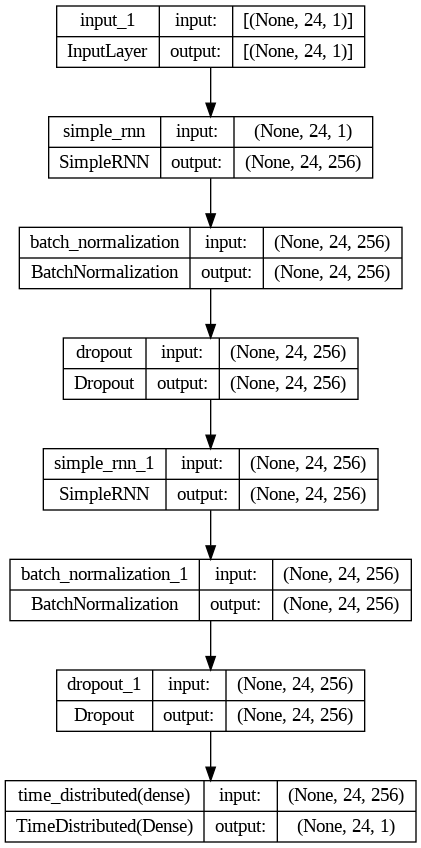

In [ ]:
keras.utils.plot_model(model, show_shapes = True, rankdir='TB')

### 3. Train

In [ ]:
early_stop = keras.callbacks.EarlyStopping(monitor = 'val_mae', min_delta=0.0001, patience=100,restore_best_weights=True)
model_log = model.fit(X_train,y_train,validation_data=(X_val, y_val), epochs=1000,callbacks=[early_stop],batch_size =512)

Epoch 1/1000
3/3 [==============================] - 7s 355ms/step - loss: 1.9682 - mae: 1.9682 - val_loss: 0.4862 - val_mae: 0.4862
Epoch 2/1000
3/3 [==============================] - 0s 103ms/step - loss: 1.0387 - mae: 1.0387 - val_loss: 0.2370 - val_mae: 0.2370
Epoch 3/1000
3/3 [==============================] - 0s 111ms/step - loss: 0.7878 - mae: 0.7878 - val_loss: 0.2349 - val_mae: 0.2349
Epoch 4/1000
3/3 [==============================] - 0s 119ms/step - loss: 0.7405 - mae: 0.7405 - val_loss: 0.2010 - val_mae: 0.2010
Epoch 5/1000
3/3 [==============================] - 0s 104ms/step - loss: 0.6800 - mae: 0.6800 - val_loss: 0.2124 - val_mae: 0.2124
Epoch 6/1000
3/3 [==============================] - 0s 87ms/step - loss: 0.6390 - mae: 0.6390 - val_loss: 0.2339 - val_mae: 0.2339
Epoch 7/1000
3/3 [==============================] - 0s 94ms/step - loss: 0.6108 - mae: 0.6108 - val_loss: 0.1878 - val_mae: 0.1878
Epoch 8/1000
3/3 [==============================] - 0s 104ms/step - loss: 0.58

In [ ]:
model.save("rnn.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



In [ ]:
from keras.models import load_model
model.save('rnn_final.keras')
loaded_model = load_model('rnn_final.keras')
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 24, 256)           66048     
                                                                 
 batch_normalization (Batch  (None, 24, 256)           1024      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 24, 256)           0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 24, 256)           131328    
                                                                 
 batch_normalization_1 (Bat  (None, 24, 256)           1024      
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 24, 256)           0

### 4. Use

In [ ]:
X_use, y_use = split_series(scaled_use[-2*past_num:,:],past_num, future_num)
print(X_use)
#print(y_test)
X_use.shape

[[[0.16666667]
  [0.16666667]
  [0.58333333]
  [0.16666667]
  [0.41666667]
  [0.5       ]
  [0.16666667]
  [0.41666667]
  [0.        ]
  [0.25      ]
  [0.25      ]
  [0.25      ]
  [0.33333333]
  [0.58333333]
  [0.41666667]
  [0.16666667]
  [0.41666667]
  [0.16666667]
  [0.41666667]
  [0.25      ]
  [0.25      ]
  [0.16666667]
  [0.16666667]
  [0.16666667]]]


(1, 24, 1)

In [ ]:
y_use_reverse = pd.DataFrame(scaler.inverse_transform(y_use.reshape((future_num, n_feature))), columns=fam)
y_use_reverse

,BEAUTY
0,3.0
1,1.0
2,7.0
3,3.0
4,1.0
5,2.0
6,3.0
7,2.0
8,3.0
9,4.0


In [ ]:
type(X_use)

numpy.ndarray

In [ ]:
import pickle as pkl
filenm = 'LR_AdmissionPrediction.pickle'
lr_pickle = pkl.load(open(filenm, 'rb'))
prick = lr_pickle.predict(X_use)
prick

1/1 [==============================] - 3s 3s/step


array([[[0.22919221],
        [0.23786381],
        [0.23589939],
        [0.22342679],
        [0.18241149],
        [0.14211151],
        [0.13798614],
        [0.15467024],
        [0.16339906],
        [0.18987122],
        [0.20072491],
        [0.21438496],
        [0.22066137],
        [0.22491351],
        [0.22107582],
        [0.2212488 ],
        [0.22542125],
        [0.21961752],
        [0.22623527],
        [0.22059141],
        [0.22414345],
        [0.22121602],
        [0.22295544],
        [0.22190498]]], dtype=float32)

In [ ]:
y_pred = model.predict(X_use)
y_pred

1/1 [==============================] - 0s 233ms/step


array([[[0.22919221],
        [0.23786381],
        [0.23589939],
        [0.22342679],
        [0.18241149],
        [0.14211151],
        [0.13798614],
        [0.15467024],
        [0.16339906],
        [0.18987122],
        [0.20072491],
        [0.21438496],
        [0.22066137],
        [0.22491351],
        [0.22107582],
        [0.2212488 ],
        [0.22542125],
        [0.21961752],
        [0.22623527],
        [0.22059141],
        [0.22414345],
        [0.22121602],
        [0.22295544],
        [0.22190498]]], dtype=float32)

In [ ]:
y_pred_reverse = pd.DataFrame(scaler.inverse_transform(y_pred.reshape((future_num, n_feature))), columns=fam)
y_pred_reverse

,BEAUTY
0,2.750307
1,2.854366
2,2.830793
3,2.681121
4,2.188938
5,1.705338
6,1.655834
7,1.856043
8,1.960789
9,2.278455


In [ ]:
print(y_use_reverse.iloc[:,1])
print(y_pred_reverse.iloc[:,1])

In [ ]:
def evaluate_forecast(y_test_inverse, yhat_inverse):
 mse_ = keras.losses.MeanSquaredError()
 mae_ = keras.losses.MeanAbsoluteError()
 mape_ =keras.losses.MeanAbsolutePercentageError()
 mae = mae_(y_test_inverse,yhat_inverse)
 print('mae:', mae)
 mse = mse_(y_test_inverse,yhat_inverse)
 print('mse:', mse)
 mape = mape_(y_test_inverse,yhat_inverse)
 print('mape:', mape)
evaluate_forecast(y_use_reverse.iloc[:,1], y_pred_reverse.iloc[:,1])
evaluate_forecast(y_use_reverse.iloc[:,0], y_pred_reverse.iloc[:,0])

mae: tf.Tensor(384.2515, shape=(), dtype=float32)
mse: tf.Tensor(268141.97, shape=(), dtype=float32)
mape: tf.Tensor(26.789015, shape=(), dtype=float32)
mae: tf.Tensor(1.985201, shape=(), dtype=float32)
mse: tf.Tensor(8.120683, shape=(), dtype=float32)
mape: tf.Tensor(44.741383, shape=(), dtype=float32)


In [ ]:
def draw_to_comp(y_pred, y_use, fam):
  pred = go.Scatter(
      x = y_pred.index,
      y = y_pred.values[:,fam],
      mode = 'lines+markers',
      name = 'pred'
  )

  real_data = go.Scatter(
      x = y_use.index,
      y =y_use.values[:,fam],
      mode = 'lines+markers',
      name = 'real'
  )

  layout = go.Layout (title=f'{fam}', xaxis_title='Date', yaxis_title='Sale')

  fig = go.Figure(data=[pred, real_data], layout=layout)
  fig.show()
draw_to_comp(y_pred_reverse,y_use_reverse,0)
draw_to_comp(y_pred_reverse,y_use_reverse,1)

##LSTM

In [ ]:
store = 1
fam =  ['BEAUTY', 'BEVERAGES']
lstm_df = main_df.copy()

lstm_one_df = lstm_df.loc[(lstm_df['family'].isin(fam)) & (lstm_df['store_nbr']==store)]
lstm_one_df

,id,date,store_nbr,family,sales,onpromotion
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
1784,1784,2013-01-02,1,BEAUTY,2.0,0
1785,1785,2013-01-02,1,BEVERAGES,1091.0,0
3566,3566,2013-01-03,1,BEAUTY,0.0,0
...,...,...,...,...,...,...
2995545,2995545,2017-08-13,1,BEVERAGES,803.0,5
2997326,2997326,2017-08-14,1,BEAUTY,6.0,1
2997327,2997327,2017-08-14,1,BEVERAGES,2201.0,9
2999108,2999108,2017-08-15,1,BEAUTY,4.0,1


In [ ]:
#fill in 25-12
lstm_one_df['date'] = pd.to_datetime(lstm_one_df['date'])
print(lstm_one_df.loc[(lstm_one_df['date']=='2013-12-25')].values)
dec25 = list()
for year in range(2013,2017):
  for f in fam:
    dec18 = lstm_one_df.loc[(lstm_one_df['date'] == f'{year}-12-18') & (lstm_one_df['family']==f)]
    dec25 += [{'date': pd.Timestamp(f'{year}-12-25'),'store_nbr':store, 'family': f, 'sales': dec18['sales'].values[0], 'onpromotion': 0}]

lstm_chris_df = pd.concat([lstm_one_df, pd.DataFrame(dec25)], ignore_index=True).sort_values('date')
print(lstm_chris_df.loc[(lstm_chris_df['date']=='2013-12-25')])

[]
      id       date  store_nbr     family   sales  onpromotion
3369 NaN 2013-12-25          1  BEVERAGES  1122.0            0
3368 NaN 2013-12-25          1     BEAUTY     0.0            0


<ipython-input-113-198120e72906>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#add some feature
oil_df['date'] = pd.to_datetime(oil_df['date'])
whole_df = lstm_chris_df.merge(oil_df, how='left',on='date')
if whole_df['dcoilwtico'].isna().any():
    whole_df['dcoilwtico'].fillna(method='bfill', inplace=True)

whole_df

In [ ]:
weekday = pd.get_dummies(lstm_chris_df['date'].dt.weekday)
weekday.columns = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

lstm_ses = pd.concat([lstm_chris_df, weekday], axis=1)

# lstm_ready = pd.get_dummies(lstm_ses, columns = ['family'])
lstm_ready=lstm_ses.drop(['id','store_nbr'], axis=1)
lstm_ready

,date,family,sales,onpromotion,Mon,Tue,Wed,Thu,Fri,Sat,Sun
0,2013-01-01,BEAUTY,0.0,0,0,1,0,0,0,0,0
1,2013-01-01,BEVERAGES,0.0,0,0,1,0,0,0,0,0
2,2013-01-02,BEAUTY,2.0,0,0,0,1,0,0,0,0
3,2013-01-02,BEVERAGES,1091.0,0,0,0,1,0,0,0,0
4,2013-01-03,BEAUTY,0.0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3363,2017-08-13,BEVERAGES,803.0,5,0,0,0,0,0,0,1
3364,2017-08-14,BEAUTY,6.0,1,1,0,0,0,0,0,0
3365,2017-08-14,BEVERAGES,2201.0,9,1,0,0,0,0,0,0
3366,2017-08-15,BEAUTY,4.0,1,0,1,0,0,0,0,0


In [ ]:
lstm_ready['family']

0          BEAUTY
1       BEVERAGES
2          BEAUTY
3       BEVERAGES
4          BEAUTY
          ...    
3363    BEVERAGES
3364       BEAUTY
3365    BEVERAGES
3366       BEAUTY
3367    BEVERAGES
Name: family, Length: 3376, dtype: object

In [ ]:
fam = ['BEAUTY','BEVERAGES']
lstm_one_ready =  lstm_ready.loc[lstm_ready['family']==fam[0]]
lstm_two_ready =  lstm_ready.loc[lstm_ready['family']==fam[1]]
print(lstm_two_ready)
print(lstm_one_ready)

           date     family   sales  onpromotion  Mon  Tue  Wed  Thu  Fri  Sat  \
1    2013-01-01  BEVERAGES     0.0            0    0    1    0    0    0    0   
3    2013-01-02  BEVERAGES  1091.0            0    0    0    1    0    0    0   
5    2013-01-03  BEVERAGES   919.0            0    0    0    0    1    0    0   
7    2013-01-04  BEVERAGES   953.0            0    0    0    0    0    1    0   
9    2013-01-05  BEVERAGES  1160.0            0    0    0    0    0    0    1   
...         ...        ...     ...          ...  ...  ...  ...  ...  ...  ...   
3359 2017-08-11  BEVERAGES  1006.0            3    0    0    0    0    1    0   
3361 2017-08-12  BEVERAGES  1659.0            7    0    0    0    0    0    1   
3363 2017-08-13  BEVERAGES   803.0            5    0    0    0    0    0    0   
3365 2017-08-14  BEVERAGES  2201.0            9    1    0    0    0    0    0   
3367 2017-08-15  BEVERAGES  1942.0           11    0    1    0    0    0    0   

      Sun  
1       0  
3  

In [ ]:
from datetime import datetime
train_test_split = datetime.strptime('1.8.2017 00:00:00', '%d.%m.%Y %H:%M:%S')
# p = int(0.8*len(lstm_df))
# BEAUTY
train_df = {'BEAUTY':[],'BEVERAGES':[]}
test_df = {'BEAUTY':[],'BEVERAGES':[]}
lstm_ses_one = lstm_one_ready.rename(columns={'date': 'ds', 'sales': 'y', 'family': 'unique_id'})
lstm_ses_two = lstm_two_ready.rename(columns={'date': 'ds', 'sales': 'y', 'family': 'unique_id'})
train_df['BEAUTY'].append(lstm_ses_one.loc[lstm_ses_one['ds'] < train_test_split])
test_df['BEAUTY'].append(lstm_ses_one.loc[lstm_ses_one['ds'] >= train_test_split ])

train_df['BEVERAGES'].append(lstm_ses_two.loc[lstm_ses_two['ds'] < train_test_split])
test_df['BEVERAGES'].append(lstm_ses_two.loc[lstm_ses_two['ds'] >= train_test_split ])

h = test_df['BEAUTY'][0]['ds'].nunique()
h

15

In [ ]:
!pip install neuralforecast

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.6/170.6 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 kB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 49.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 70.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 11.1 MB/s eta 0:00:00


In [ ]:
from neuralforecast import NeuralForecast
from neuralforecast.models import LSTM
from neuralforecast.losses.pytorch import DistributionLoss

models = [LSTM(h=h,
               loss=DistributionLoss(distribution='Normal', level=[90]),
               max_steps=100,
               encoder_n_layers=2,
               encoder_hidden_size=200,
               context_size=10,
               decoder_hidden_size=200,
               decoder_layers=2,
               learning_rate=1e-3,
               scaler_type='standard',
               futr_exog_list=['onpromotion'])]

model = NeuralForecast(models=models, freq='D')

INFO:lightning_fabric.utilities.seed:Seed set to 1


In [ ]:
model.fit(train_df['BEAUTY'][0])

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

In [ ]:
y_pred = model.predict(futr_df = test_df['BEAUTY'][0]).reset_index()
y_pred_merge = y_pred.merge(test_df['BEAUTY'][0][['ds','unique_id','y']],on=['ds','unique_id'],how='left')

Predicting: |          | 0/? [00:00<?, ?it/s]

In [ ]:
y_pred_merge

,unique_id,ds,LSTM,LSTM-median,LSTM-lo-90,LSTM-hi-90,y
0,BEAUTY,2017-08-01,2.178180,2.174079,-0.420915,4.522251,4.0
1,BEAUTY,2017-08-02,4.012986,4.004077,0.646387,7.231034,2.0
2,BEAUTY,2017-08-03,3.969938,4.014317,0.668449,7.142130,5.0
3,BEAUTY,2017-08-04,3.944256,3.962083,0.718170,7.379655,7.0
4,BEAUTY,2017-08-05,4.507149,4.525101,0.895873,8.047778,3.0
5,BEAUTY,2017-08-06,4.404064,4.481459,0.827614,8.001237,2.0
6,BEAUTY,2017-08-07,3.671582,3.655954,0.229970,6.996011,5.0
7,BEAUTY,2017-08-08,4.452463,4.458859,0.917444,7.942424,2.0
8,BEAUTY,2017-08-09,3.998087,3.979792,0.944533,7.113678,4.0
9,BEAUTY,2017-08-10,3.781365,3.819489,0.608662,6.889392,10.0


In [ ]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Create a figure with subplots
fig = make_subplots(rows=1, cols=1)
plot_df = y_pred_merge.copy()
# Create traces for y and LSTM
pred = go.Scatter(x=plot_df.index, y=plot_df['y'], mode='lines+markers', name='y', line=dict(width=2))
real_data = go.Scatter(x=plot_df.index, y=plot_df['LSTM'], mode='lines', name='LSTM', line=dict(width=2))

# Update layout
layout = go.Layout (title=f'{fam} of store {store}', xaxis_title='Date', yaxis_title='Sale')
fig = go.Figure(data=[pred,real_data],layout=layout)
# Show the plot
fig.show()


In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

def evaluate_forecast(y_test_inverse, yhat_inverse):
 mse_ = keras.losses.MeanSquaredError()
 mae_ = keras.losses.MeanAbsoluteError()
 mape_ =keras.losses.MeanAbsolutePercentageError()
 mae = mae_(y_test_inverse,yhat_inverse)
 print('mae:', mae)
 mse = mse_(y_test_inverse,yhat_inverse)
 print('mse:', mse)
 mape = mape_(y_test_inverse,yhat_inverse)
 print('mape:', mape)
evaluate_forecast(test_df['BEAUTY'][0]['y'], y_pred['LSTM'])

 MAE: 1.9403640429178874
mae: tf.Tensor(1.9403640429178874, shape=(), dtype=float64)
mse: tf.Tensor(5.953062635417973, shape=(), dtype=float64)
mape: tf.Tensor(69.7194560368856, shape=(), dtype=float64)


### FORECATING ON BEVERAGES

In [ ]:
model.fit(train_df['BEVERAGES'][0])

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

In [ ]:
y_pred = model.predict(futr_df = test_df['BEVERAGES'][0]).reset_index()
y_pred_merge = y_pred.merge(test_df['BEVERAGES'][0][['ds','unique_id','y']],on=['ds','unique_id'],how='left')

Predicting: |          | 0/? [00:00<?, ?it/s]

In [ ]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Create a figure with subplots
fig = make_subplots(rows=1, cols=1)
plot_df = y_pred_merge.copy()
# Create traces for y and LSTM
pred = go.Scatter(x=plot_df.index, y=plot_df['y'], mode='lines+markers', name='y', line=dict(width=2))
real_data = go.Scatter(x=plot_df.index, y=plot_df['LSTM'], mode='lines', name='LSTM', line=dict(width=2))

# Update layout
layout = go.Layout (title=f'{fam} of store {store}', xaxis_title='Date', yaxis_title='Sale')
fig = go.Figure(data=[pred,real_data],layout=layout)
# Show the plot
fig.show()

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

def evaluate_forecast(y_test_inverse, yhat_inverse):
 mse_ = keras.losses.MeanSquaredError()
 mae_ = keras.losses.MeanAbsoluteError()
 mape_ =keras.losses.MeanAbsolutePercentageError()
 mae = mae_(y_test_inverse,yhat_inverse)
 print('mae:', mae)
 mse = mse_(y_test_inverse,yhat_inverse)
 print('mse:', mse)
 mape = mape_(y_test_inverse,yhat_inverse)
 print('mape:', mape)
evaluate_forecast(test_df['BEVERAGES'][0]['y'], y_pred['LSTM'])

mae: tf.Tensor(413.830712890625, shape=(), dtype=float64)
mse: tf.Tensor(274822.835947003, shape=(), dtype=float64)
mape: tf.Tensor(31.581412072650643, shape=(), dtype=float64)
